In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [17]:
path_antoine = "/Users/antoine.gilson/Desktop/The-Design-and-Analysis-of-Benchmark-Experiments/Plots/"

In [2]:
beta2_values = np.linspace(0, 0.16, 9)

### Introduction, variables, training and test sets

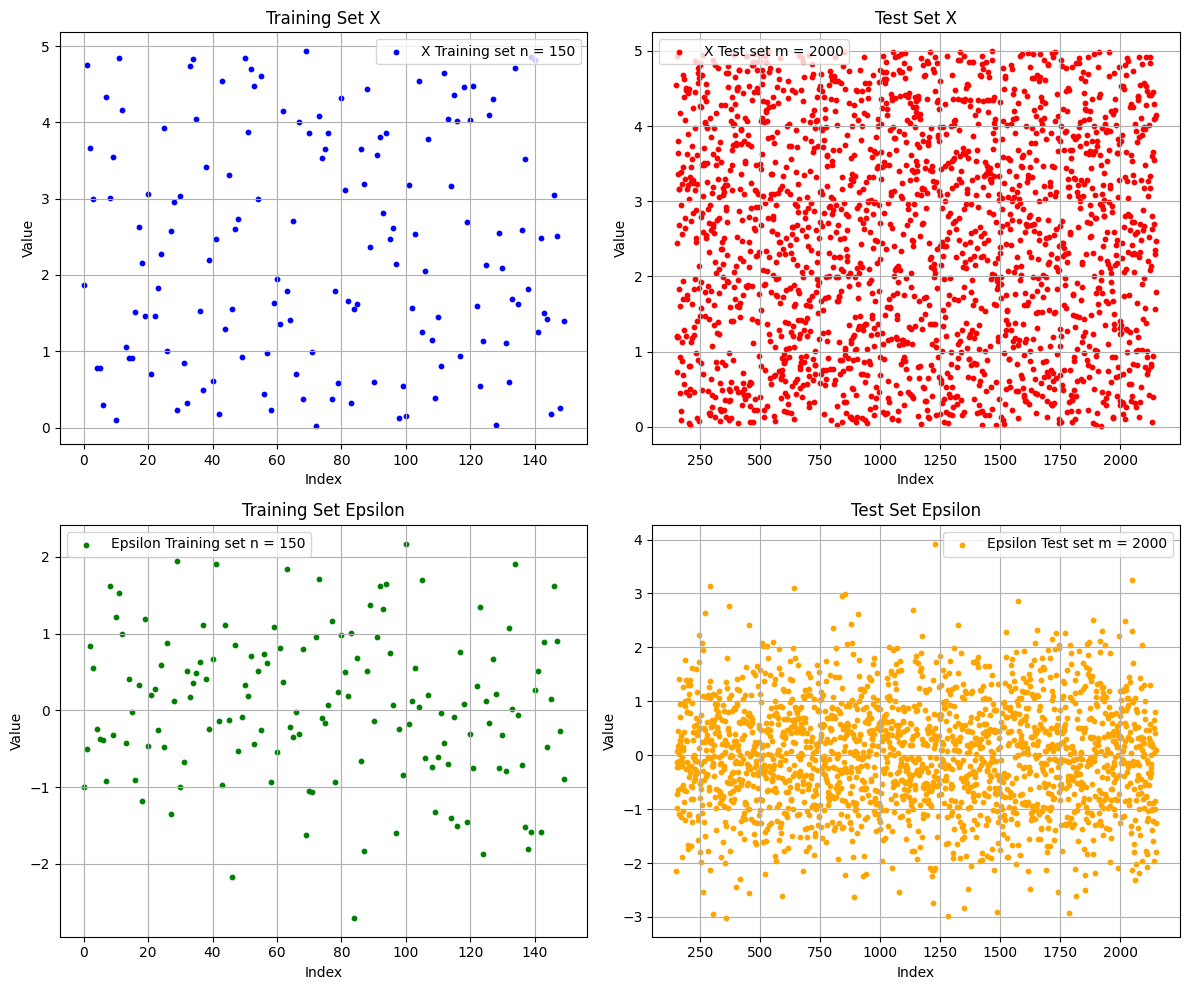

In [65]:
import numpy as np
import matplotlib.pyplot as plt

n = 150
m = 2000

np.random.seed(42)
x = np.random.uniform(0, 5, n + m)

x_train = x[:n]
x_test = x[n:n+m]

epsilon = np.random.normal(0, 1, n + m) 
epsilon_train = epsilon[:n]
epsilon_test = epsilon[n:n+m]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plotting X Training set
ax[0, 0].scatter(np.arange(n), x_train, label="X Training set n = 150", color="blue", s = 10)
ax[0, 0].set_title("Training Set X")
ax[0, 0].set_xlabel("Index")
ax[0, 0].set_ylabel("Value")
ax[0, 0].legend()
ax[0, 0].grid()

# Plotting X Test set
ax[0, 1].scatter(np.arange(n, n + m), x_test, label="X Test set m = 2000", color="red", s = 10)
ax[0, 1].set_title("Test Set X")
ax[0, 1].set_xlabel("Index")
ax[0, 1].set_ylabel("Value")
ax[0, 1].legend()
ax[0, 1].grid()

# Plotting Epsilon Training set
ax[1, 0].scatter(np.arange(n), epsilon_train, label="Epsilon Training set n = 150", color="green", s = 10)
ax[1, 0].set_title("Training Set Epsilon")
ax[1, 0].set_xlabel("Index")
ax[1, 0].set_ylabel("Value")
ax[1, 0].legend()
ax[1, 0].grid()

# Plotting Epsilon Test set
ax[1, 1].scatter(np.arange(n, n + m), epsilon_test, label="Epsilon Test set m = 2000", color="orange", s = 10)
ax[1, 1].set_title("Test Set Epsilon")
ax[1, 1].set_xlabel("Index")
ax[1, 1].set_ylabel("Value")
ax[1, 1].legend()
ax[1, 1].grid()

plt.tight_layout()
plt.show()


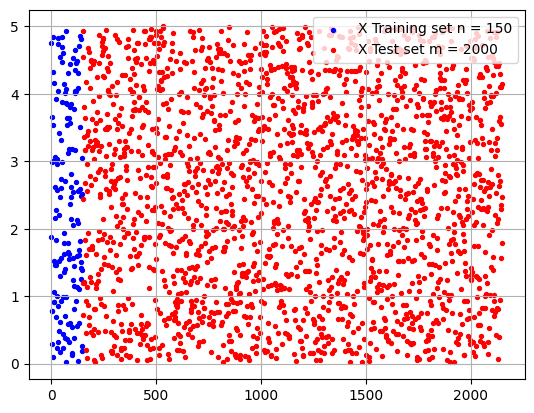

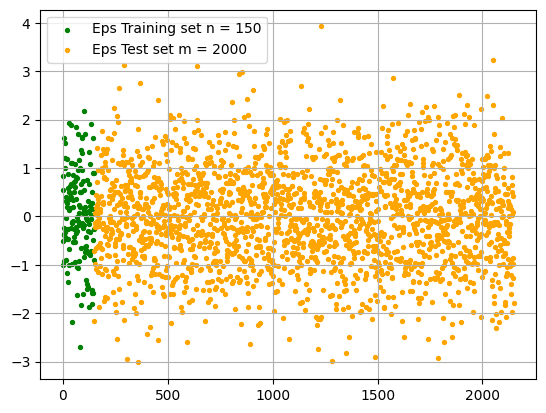

In [66]:

plt.figure()
plt.scatter(np.arange(n), x_train, label = "X Training set n = 150", color = "blue", s = 8)
plt.scatter(np.arange(n, n+m), x_test, label = "X Test set m = 2000", color = "red", s = 8)
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.scatter(np.arange(n), epsilon_train, label = "Eps Training set n = 150", color = "green", s = 8)
plt.scatter(np.arange(n, n+m), epsilon_test, label = "Eps Test set m = 2000", color = "orange", s = 8)
plt.legend()
plt.grid()
plt.show()

### Objective function : y 

In [ ]:
n = 150
m = 2000
np.random.seed(42)
beta1 = 2
beta2_values_bis = [0.2, 0.3, 0.4, 0.5, 1]
epsilon = np.random.normal(0, 1, n + m) 
x = np.random.uniform(0, 5, n + m)

x_train = x[:n]
x_test = x[n:n+m]

epsilon_train = epsilon[:n]
epsilon_test = epsilon[n:n+m]
    
for beta2 in beta2_values:
            
    y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
    y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

    plt.figure()
    plt.scatter(np.arange(n), y_train, label = "Y corresponding to training set n = 150", color = "blue", s = 8)
    plt.scatter(np.arange(n, n+m), y_test, label = "Y corresponding to test set m = 2000", color = "red", s = 8)
    plt.legend()
    plt.grid()
    filename = f"{path_antoine}/Objective/objective_y_m_{m}_beta2_{beta2}.png"
    plt.savefig(filename)

### Graphical approach of model precision and errors

In [ ]:
n = 150

M = [50, 100, 150, 200, 500, 1000, 2000]

for m in M:

   np.random.seed(42)
   beta1 = 2
   beta2_values_bis = [0.2, 0.3, 0.4, 0.5, 1]
   epsilon = np.random.normal(0, 1, n + m) 
   x = np.random.uniform(0, 5, n + m)

   x_train = x[:n]
   x_test = x[n:n+m]

   epsilon_train = epsilon[:n]
   epsilon_test = epsilon[n:n+m]
    
   for beta2 in beta2_values:
            
       y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
       y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
       model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
       y_pred_a = model_a.predict(x_test.reshape(-1, 1))
       pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
       x_train_quad = np.column_stack((x_train, x_train**2))
       x_test_quad = np.column_stack((x_test, x_test**2))
            
       model_b = LinearRegression().fit(x_train_quad, y_train)
       y_pred_b = model_b.predict(x_test_quad)
       pb = (y_test - y_pred_b)**2

       differences = pa - pb

       plt.figure()
       plt.title("Erreurs de prédiction des modèles pour " f"beta2 = {beta2}" " et pour "f"m = {m}" )  
      
       plt.scatter(x_test, pb, label = "Erreur de prédiction quadratique pb = (y - yb) pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "orange", s = 8)
       plt.scatter(x_test, pa, label = "Erreur de prédiction linéaire pa = (y - ya) pour " f"beta2 = {beta2}" " et pour "f"m = {m}", color = "red", s = 8)
       
       plt.grid()
       plt.legend()

       filename = f"{path_antoine}/Erreurs/plot_m_{m}_beta2_{beta2}.png"
       plt.savefig(filename)

       plt.show()



### Descriptive Statistics

In [124]:
n = 150

M = [50, 100, 150, 200, 500, 1000, 2000]

empirical_means_A = []
standard_deviations_A = []
medians_A = []
Q1_A = []
Q3_A = []

empirical_means_B = []
standard_deviations_B = []
medians_B = []
Q1_B = []
Q3_B = []

for m in M:

   a = []
   b = []
   c = []
   d = []
   q = []

   e = []
   f = []
   g = []
   h = []
   q_ = []


   np.random.seed(42)
   beta1 = 2
   beta2_values_bis = [0.2, 0.3, 0.4, 0.5, 1]
   epsilon = np.random.normal(0, 1, n + m) 
   x = np.random.uniform(0, 5, n + m)

   x_train = x[:n]
   x_test = x[n:n+m]

   epsilon_train = epsilon[:n]
   epsilon_test = epsilon[n:n+m]
    
   for beta2 in beta2_values:
            
       y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
       y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
       model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
       y_pred_a = model_a.predict(x_test.reshape(-1, 1))
       pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
       x_train_quad = np.column_stack((x_train, x_train**2))
       x_test_quad = np.column_stack((x_test, x_test**2))
            
       model_b = LinearRegression().fit(x_train_quad, y_train)
       y_pred_b = model_b.predict(x_test_quad)
       pb = (y_test - y_pred_b)**2

       differences = pa - pb

       mean_a = sum(pa)/m
       mean_b = sum(pb)/m

       a.append(mean_a)
       e.append(mean_b)

       std_a = np.std(pa)
       std_b = np.std(pb)

       b.append(std_a)
       f.append(std_b)

       q1_a = np.percentile(pa, 25)
       med_a = np.percentile(pa, 50)        
       q3_a = np.percentile(pa, 75)

       q1_b = np.percentile(pb, 25)
       med_b = np.percentile(pb, 50)        
       q3_b = np.percentile(pb, 75)

       c.append(med_a)
       g.append(med_b)
       d.append(q1_a)
       q.append(q3_a)
       h.append(q1_b)
       q_.append(q3_b)

   empirical_means_A.append(a)
   empirical_means_B.append(e)
   standard_deviations_A.append(b)
   standard_deviations_B.append(f)
   medians_A.append(c)
   medians_B.append(g)
   Q1_A.append(d)
   Q1_B.append(h)
   Q3_A.append(q)
   Q3_B.append(q_)

In [125]:
data_A_all = {
    "Empirical Mean": empirical_means_A,
    "Standard Deviation": standard_deviations_A,
    "Median": medians_A,
    "Q1": Q1_A,
    "Q3": Q3_A
}

stats_A_all = pd.DataFrame(data_A_all, index=M)

data_B_all = {
    "Empirical Mean": empirical_means_B,
    "Standard Deviation": standard_deviations_B,
    "Median": medians_B,
    "Q1": Q1_B,
    "Q3": Q3_B
}

stats_B_all = pd.DataFrame(data_B_all, index=M)

In [126]:
df_empirical_means_A = pd.DataFrame(empirical_means_A, index=M, columns=beta2_values).transpose()
df_standard_deviations_A = pd.DataFrame(standard_deviations_A, index=M, columns=beta2_values).transpose()
df_medians_A = pd.DataFrame(medians_A, index=M, columns=beta2_values).transpose()
df_Q1_A = pd.DataFrame(Q1_A, index=M, columns=beta2_values).transpose()
df_Q3_A = pd.DataFrame(Q3_A, index=M, columns=beta2_values).transpose()

In [127]:
df_empirical_means_B = pd.DataFrame(empirical_means_B, index=M, columns=beta2_values).transpose()
df_standard_deviations_B = pd.DataFrame(standard_deviations_B, index=M, columns=beta2_values).transpose()
df_medians_B = pd.DataFrame(medians_B, index=M, columns=beta2_values).transpose()
df_Q1_B = pd.DataFrame(Q1_B, index=M, columns=beta2_values).transpose()
df_Q3_B = pd.DataFrame(Q3_B, index=M, columns=beta2_values).transpose()

### Inferential statistics

We already have the standard error of the mean (according to m and beta2), that gives us a first information of the precisation of mA

Derive formulas (or algorithms) for the standard error (SE) of the mean

Methods: 
- parametric estimates (consider different cases when n is small versus large and when VA is assumed to be Gaussian or not)
- bootstrap estimates

In [132]:
# For n large (normal distrib), for n small (student distrib), VA gaussian

n_sqrt = np.sqrt(n)
df_standard_error_A = df_standard_deviations_A.apply(lambda x: x / n_sqrt)
df_standard_error_B = df_standard_deviations_B.apply(lambda x: x / n_sqrt)

In [143]:
# Bootstrap estimate : sur l'ensemble de test

n = 150

M = [50, 100, 150, 200, 500, 1000, 2000]

se_bootstrap_A = []
se_boostrap_B = []

for m in M:
   
   liste_A = []
   liste_B = []

   np.random.seed(42)
   beta1 = 2
   beta2_values_bis = [0.2, 0.3, 0.4, 0.5, 1]
   epsilon = np.random.normal(0, 1, n + m) 
   x = np.random.uniform(0, 5, n + m)

   x_train = x[:n]
   x_test = x[n:n+m]

   epsilon_train = epsilon[:n]
   epsilon_test = epsilon[n:n+m]
    
   for beta2 in beta2_values:
            
       y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
       y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
       model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
       y_pred_a = model_a.predict(x_test.reshape(-1, 1))
       pa = (y_test - y_pred_a)**2
    
        # Quadratic Model : B
       x_train_quad = np.column_stack((x_train, x_train**2))
       x_test_quad = np.column_stack((x_test, x_test**2))
            
       model_b = LinearRegression().fit(x_train_quad, y_train)
       y_pred_b = model_b.predict(x_test_quad)
       pb = (y_test - y_pred_b)**2
       
       B = 1000
       bootstrap_means = np.zeros(B)

       for i in range(B):
          
          sample_indices = np.random.choice(np.arange(m), size=m, replace=True)
          bootstrap_sample = pa[sample_indices]
          bootstrap_means[i] = np.mean(bootstrap_sample)

       se_bootstrap_A_i = np.std(bootstrap_means)

       liste_A.append(se_bootstrap_A_i)

       for i in range(B):
          
          sample_indices = np.random.choice(np.arange(m), size=m, replace=True)
          bootstrap_sample = pb[sample_indices]
          bootstrap_means[i] = np.mean(bootstrap_sample)

       se_bootstrap_B_i = np.std(bootstrap_means)

       liste_B.append(se_bootstrap_B_i)
    
   se_bootstrap_A.append(liste_A)
   se_boostrap_B.append(liste_B)

   df_se_bootstrap_A = pd.DataFrame(se_bootstrap_A, index=M, columns=beta2_values).transpose()
   df_se_bootstrap_B = pd.DataFrame(se_bootstrap_B, index=M, columns=beta2_values).transpose()

In [157]:
# Bootstrap ensemble d'entrainement

def se_bootstrap(n, B, m):

    np.random.seed(42)

    se_bootstrap_A = []
    se_bootstrap_B = []

    beta1 = 2
    B = 250
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]

    bootstrap_indices = np.random.choice(n, size=(B, n), replace=True) # bootstrapping
    
    for beta2 in beta2_values:

        liste_A = []
        liste_B = []

        for bootstrap_index in bootstrap_indices:
       
           x_train = x[bootstrap_index]
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon[bootstrap_index]
      
           y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
           y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

           model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
           y_pred_a = model_a.predict(x_test.reshape(-1, 1))
           pa = (y_test - y_pred_a)**2

           x_train_quad = np.column_stack((x_train, x_train**2))
           x_test_quad = np.column_stack((x_test, x_test**2))

           model_b = LinearRegression().fit(x_train_quad, y_train)
           y_pred_b = model_b.predict(x_test_quad)
           pb = (y_test - y_pred_b)**2

           sea = np.std(pa, ddof=1) / (m**0.5)
           seb = np.std(pb, ddof = 1) / (m**0.5)

           liste_A.append(sea)
           liste_B.append(seb)

        se_bootstrap_A.append(sum(liste_A)/B)
        se_bootstrap_B.append(sum(liste_B)/B)
    
    return se_bootstrap_A, se_bootstrap_B     

M = [50, 100, 150, 200, 500, 1000, 2000]

liste_se_bootstrap_A = []
liste_se_bootstrap_B = []

for m in M:

    se_bootstrap_A, se_bootstrap_B = se_bootstrap(150,250,m)

    liste_se_bootstrap_A.append(se_bootstrap_A)
    liste_se_bootstrap_B.append(se_bootstrap_B)

liste_se_bootstrap_A, liste_se_bootstrap_B

df_se_bootstrap_A_v2 = pd.DataFrame(liste_se_bootstrap_A, index=M, columns=beta2_values).transpose()
df_se_bootstrap_B_v2 = pd.DataFrame(liste_se_bootstrap_B, index=M, columns=beta2_values).transpose()


### Comparaison des statistiques de test

[]

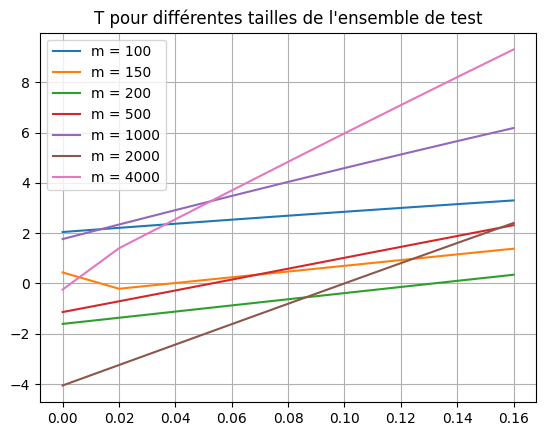

In [8]:
def comparaison_stats():
    M = [100, 150, 200, 500, 1000, 2000, 4000]
    np.random.seed(42)
    test_statistics2 = []

    for m in M:

       test_statistics, esperances_2000, variances_2000, msea_2000, mseb_2000 = power_simple(150,m)
       test_statistics2.append(test_statistics)

    df = pd.DataFrame(test_statistics2)
    df = df.transpose()
    df.columns = ["m = 100", "m = 150", "m = 200", "m = 500", "m = 1000", "m = 2000", "m = 4000"]

    return df


df = comparaison_stats()

plt.figure()
plt.title("T pour différentes tailles de l'ensemble de test")
plt.plot(beta2_values, df["m = 100"], label = "m = 100")
plt.plot(beta2_values, df["m = 150"], label = "m = 150")
plt.plot(beta2_values, df["m = 200"], label = "m = 200")
plt.plot(beta2_values, df["m = 500"], label = "m = 500")
plt.plot(beta2_values, df["m = 1000"], label = "m = 1000")
plt.plot(beta2_values, df["m = 2000"], label = "m = 2000")
plt.plot(beta2_values, df["m = 4000"], label = "m = 4000")
plt.grid()
plt.legend()
plt.plot()

### Comparaison de puissances

[]

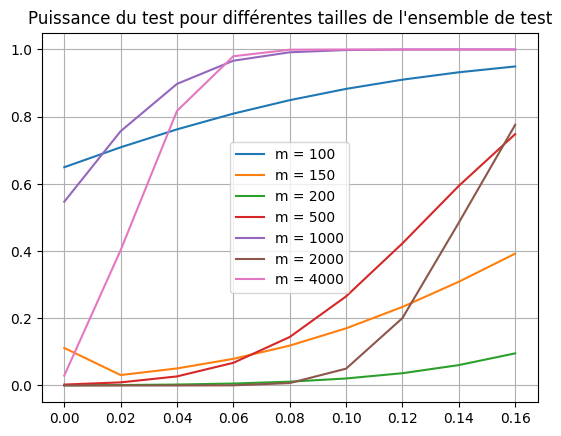

In [10]:
def comparaison_puissancess():
    M = [100, 150, 200, 500, 1000, 2000, 4000]
    np.random.seed(42)
    puissances2 = []

    for m in M:

       puissances, test_statistics, esperances_2000, variances_2000, msea_2000, mseb_2000 = puissance_simple(150,m)
       puissances2.append(puissances)

    df = pd.DataFrame(puissances2)
    df = df.transpose()
    df.columns = ["m = 100", "m = 150", "m = 200", "m = 500", "m = 1000", "m = 2000", "m = 4000"]

    return df

df2 = comparaison_puissancess()

plt.figure()
plt.title("Puissance du test pour différentes tailles de l'ensemble de test")
plt.plot(beta2_values, df2["m = 100"], label = "m = 100")
plt.plot(beta2_values, df2["m = 150"], label = "m = 150")
plt.plot(beta2_values, df2["m = 200"], label = "m = 200")
plt.plot(beta2_values, df2["m = 500"], label = "m = 500")
plt.plot(beta2_values, df2["m = 1000"], label = "m = 1000")
plt.plot(beta2_values, df2["m = 2000"], label = "m = 2000")
plt.plot(beta2_values, df2["m = 4000"], label = "m = 4000")
plt.grid()
plt.legend()
plt.plot()
